<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Gradient Boosting](#gradient_boosting)<br>
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [3]:
taxi_jan_df = pd.read_parquet("Data/yellow_tripdata_2019-01.parquet")#, engine='fastparquet')

In [4]:
taxi_jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [5]:
taxi_data = pd.concat([taxi_jan_df])

In [6]:
taxi_data.shape

(7696617, 19)

# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [7]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type','total_amount']]

In [9]:
taxi_data.shape

(7696617, 9)

In [10]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

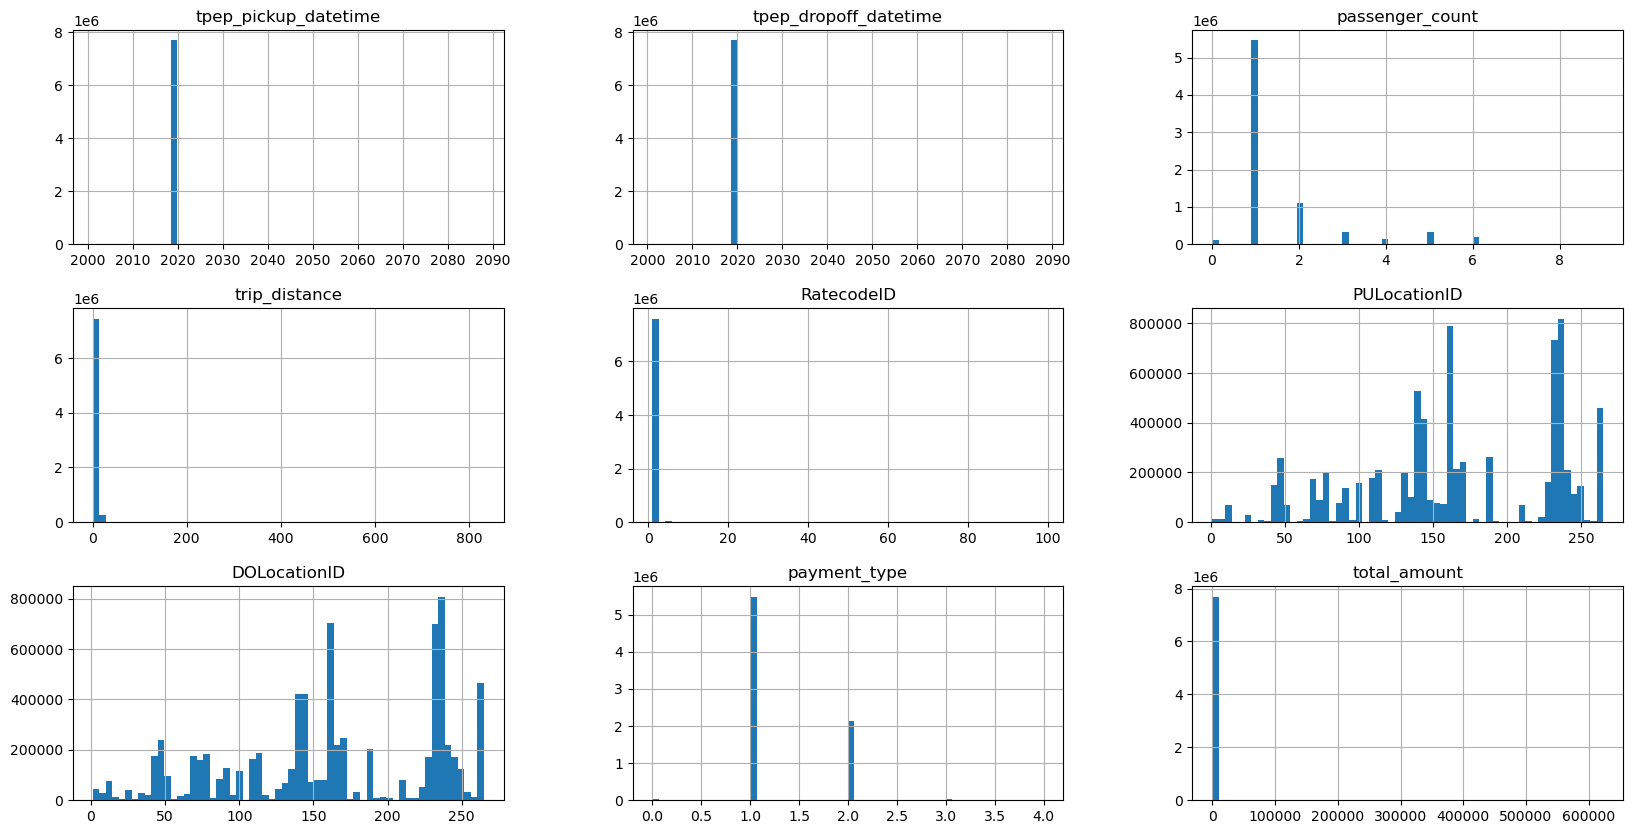

In [11]:
taxi_data.hist(
    figsize=(20,10),
    bins = 60,
)

In [12]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

In [13]:
taxi_data.index

RangeIndex(start=0, stop=7696617, step=1)

<Axes: xlabel='index', ylabel='total_amount'>

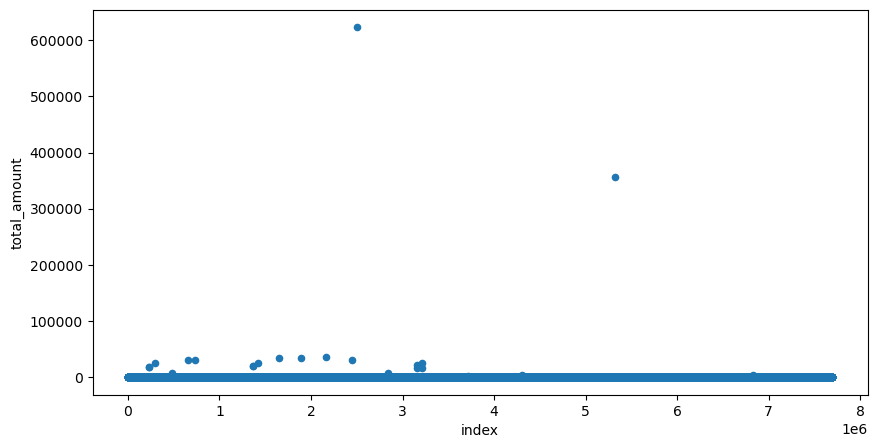

In [14]:
taxi_data.reset_index().plot(
    kind= 'scatter',
    y = 'total_amount',
    x = 'index',
    figsize = (10,5)
)



<Axes: xlabel='index', ylabel='total_amount'>

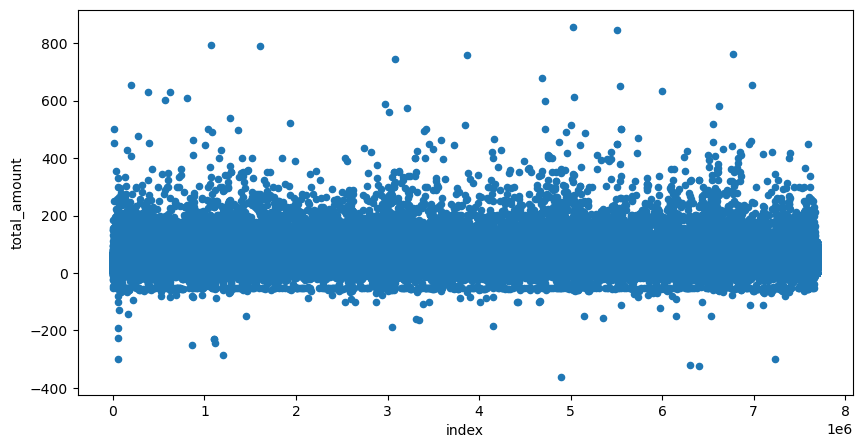

In [15]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(
    kind= 'scatter',
    y = 'total_amount',
    x = 'index',
    figsize = (10,5)
)

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

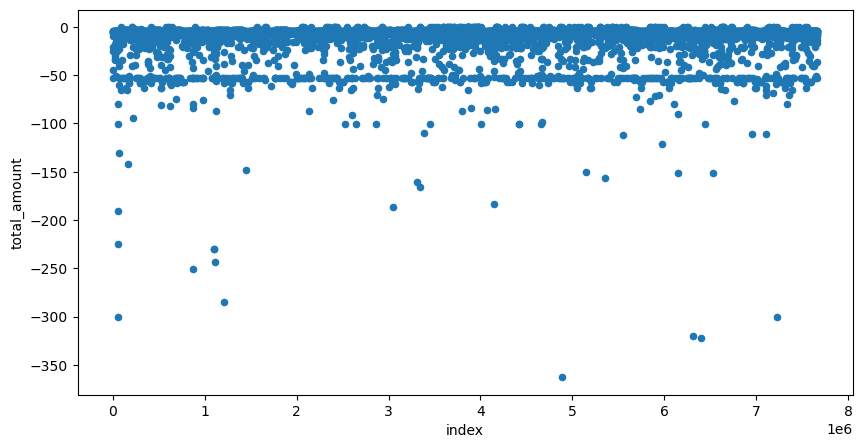

In [16]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(
    kind= 'scatter',
    y = 'total_amount',
    x = 'index',
    figsize = (10,5)
)

In [17]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

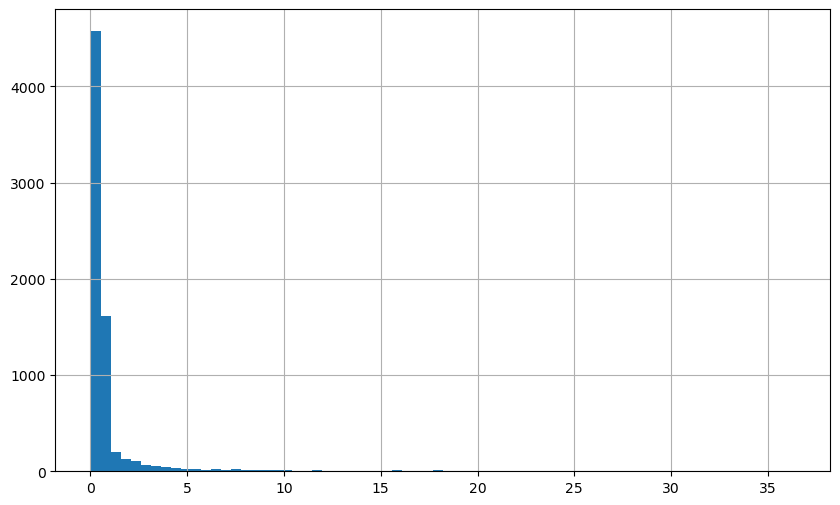

In [18]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(figsize=(10,6),bins=70)

In [19]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [20]:
taxi_data['total_amount'].max()

623261.66

In [21]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [22]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [23]:
taxi_data['total_amount'].mean()

15.810651344610214

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [24]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0) & (taxi_data['total_amount']<200)]

In [25]:
taxi_data_filtered['total_amount'].max()

199.98

In [26]:
taxi_data_filtered.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [27]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['tpep_pickup_datetime'].dt.year==2019]

In [28]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)

(7696617, 9)
(7687877, 9)


In [29]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [30]:
taxi_data_prepaired = taxi_data_filtered.copy()

In [31]:
taxi_data_prepaired.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

changing original data types to suitable types


In [32]:
taxi_data_prepaired.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepaired.loc[:,'tpep_pickup_datetime'])
taxi_data_prepaired.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepaired.loc[:,'tpep_dropoff_datetime'])

In [33]:
taxi_data_prepaired.loc[:,'RatecodeID'] = taxi_data_prepaired.loc[:,'RatecodeID'].astype(str)
taxi_data_prepaired.loc[:,'PULocationID'] = taxi_data_prepaired.loc[:,'PULocationID'].astype(str)
taxi_data_prepaired.loc[:,'DOLocationID'] = taxi_data_prepaired.loc[:,'DOLocationID'].astype(str)
taxi_data_prepaired.loc[:,'payment_type'] = taxi_data_prepaired.loc[:,'payment_type'].astype(str)

In [34]:
taxi_data_prepaired.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [35]:
taxi_data_prepaired.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00


In [36]:
taxi_data_prepaired['transaction_date']=pd.to_datetime(taxi_data_prepaired['tpep_pickup_datetime'].dt.date)
taxi_data_prepaired['transaction_year']=taxi_data_prepaired['tpep_pickup_datetime'].dt.year
taxi_data_prepaired['transaction_month']=taxi_data_prepaired['tpep_pickup_datetime'].dt.month
taxi_data_prepaired['transaction_day']=taxi_data_prepaired['tpep_pickup_datetime'].dt.day
taxi_data_prepaired['transaction_hour']=taxi_data_prepaired['tpep_pickup_datetime'].dt.hour

In [37]:
taxi_data_prepaired.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.3,1.0,163,229,1,9.05,2019-01-01,2019,1,1,0
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.7,1.0,229,7,1,18.50,2019-01-01,2019,1,1,0
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.1,1.0,141,234,1,13.00,2019-01-01,2019,1,1,0


In [38]:
taxi_data_prepaired['transaction_date'].astype('datetime64[us]')

0         2019-01-01
1         2019-01-01
7         2019-01-01
8         2019-01-01
9         2019-01-01
             ...    
7696612   2019-01-31
7696613   2019-01-31
7696614   2019-01-31
7696615   2019-01-31
7696616   2019-01-31
Name: transaction_date, Length: 7687877, dtype: datetime64[us]

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

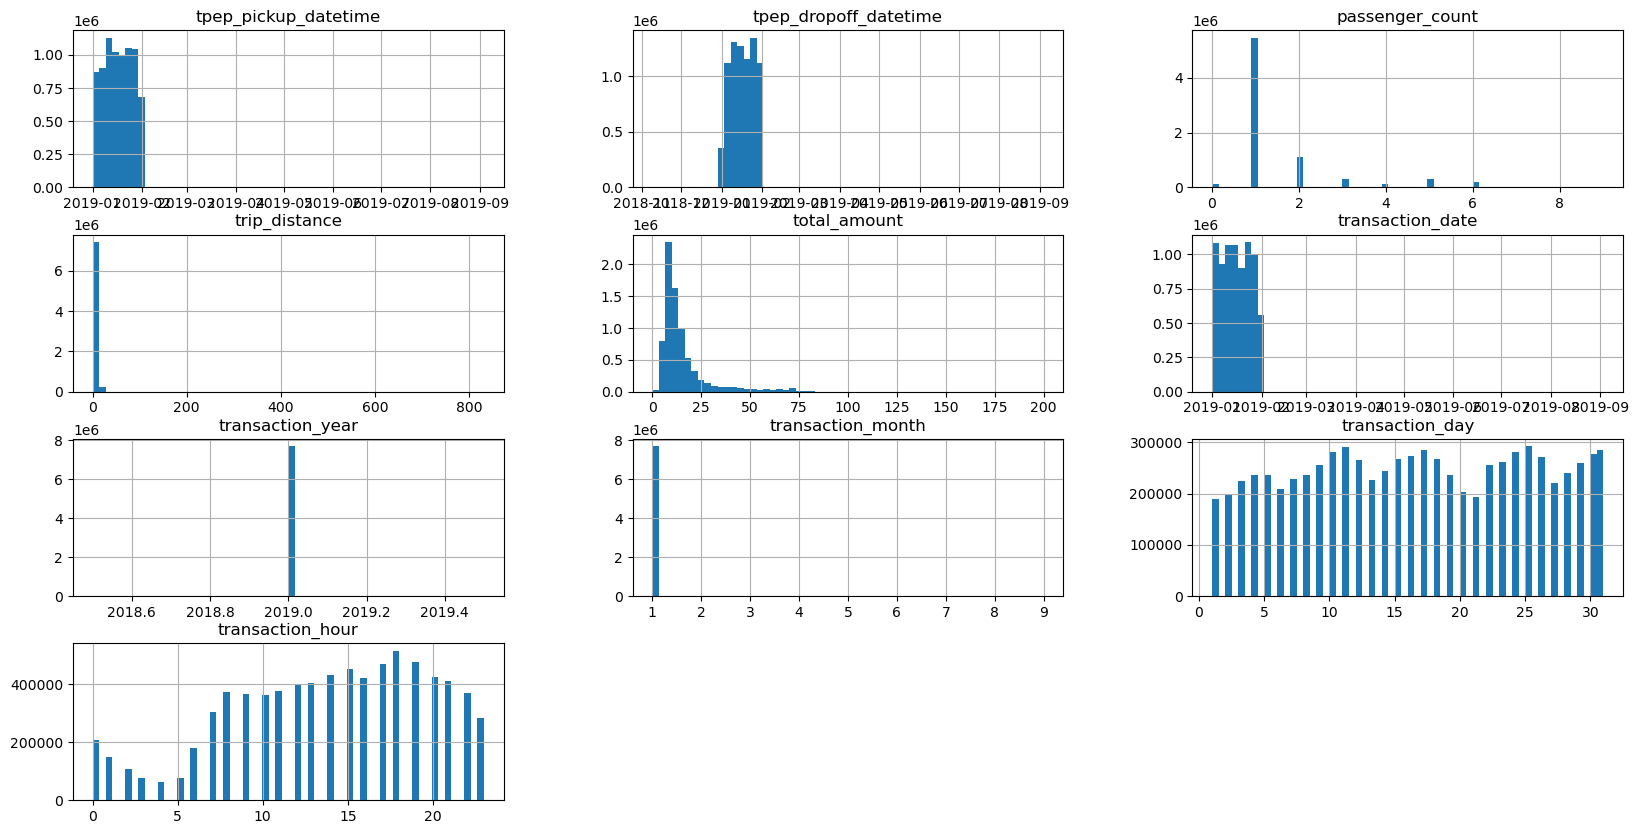

In [39]:
taxi_data_prepaired.hist(figsize=(20,10), bins=60)

In [40]:
categorical_columns = ['PULocationID','transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns+numerical_columns

In [41]:
main_taxi_df = taxi_data_prepaired[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7687877, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [42]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()

In [43]:
taxi_grouped_by_region.head(100)

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,1,2019-01-01,1,1,2,0.0,21.8000
1,1,2019-01-01,1,1,5,0.0,87.3000
2,1,2019-01-01,1,1,6,0.0,80.3000
3,1,2019-01-01,1,1,8,0.0,128.5800
4,1,2019-01-01,1,1,10,16.9,43.2450
...,...,...,...,...,...,...,...
95,1,2019-01-11,1,11,14,0.2,98.0125
96,1,2019-01-11,1,11,17,14.6,50.3000
97,1,2019-01-11,1,11,18,12.2,114.1000
98,1,2019-01-11,1,11,20,36.6,73.4500


In [44]:
taxi_grouped_by_region['count_of_transactions']=main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']

In [45]:
taxi_grouped_by_region.shape

(102782, 8)

In [46]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

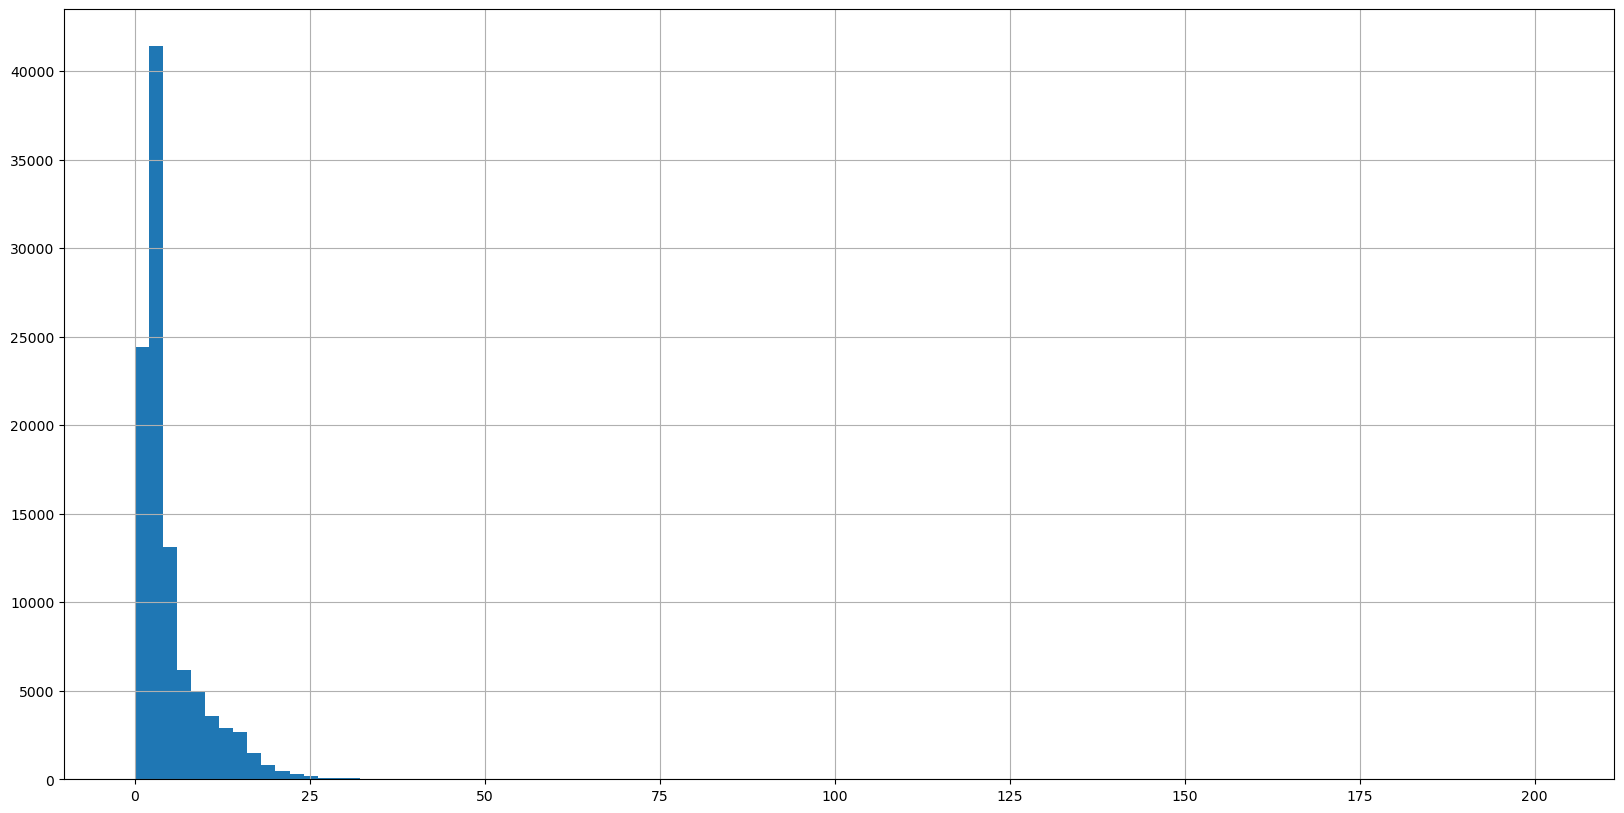

In [47]:
taxi_grouped_by_region['trip_distance'].hist(figsize=(20,10), bins=100)

<Axes: >

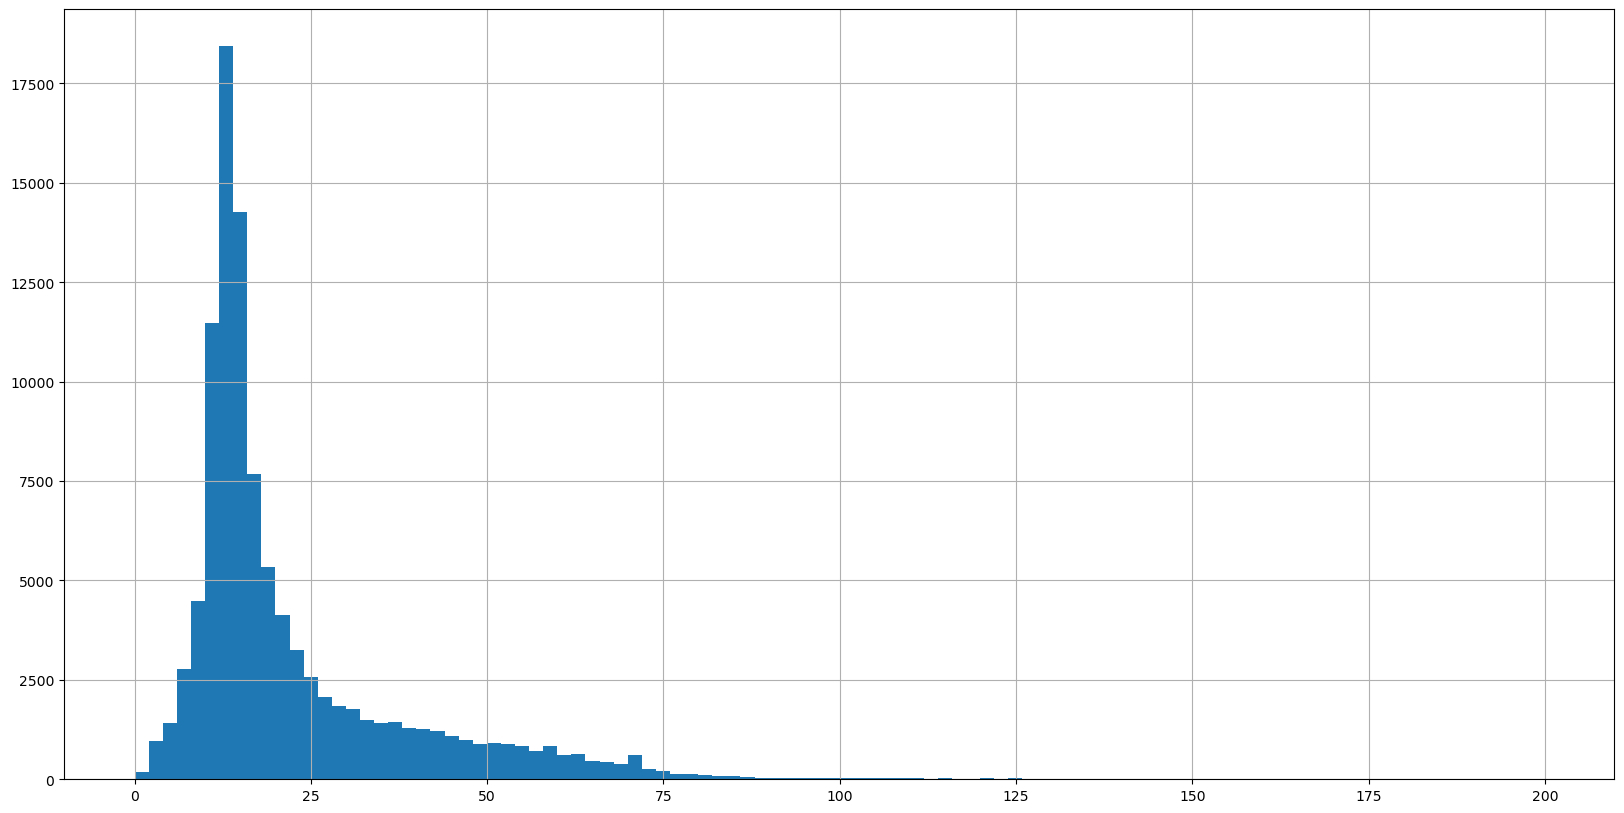

In [48]:
taxi_grouped_by_region['total_amount'].hist(figsize=(20,10), bins=100)

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [49]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [50]:
categorical_feature_benchmark = ['PULocationID','transaction_month', 'transaction_day', 'transaction_hour']
input_feature_benchmark = categorical_feature_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

## 5.1 Train-test split

In [51]:
from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_feature_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench,y_bench, test_size=0.25, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(x_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [53]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error ', mean_absolute_error(y_test_b,y_pred_b) )
print('mean_squared_error ', mean_squared_error(y_test_b,y_pred_b) )
print('root_mean_squared_error ', sqrt(mean_squared_error(y_test_b,y_pred_b)) )
print('r2 ', r2_score(y_test_b,y_pred_b) )






mean_absolute_error  3.379426966978661
mean_squared_error  61.6977046428475
root_mean_squared_error  7.854788644059591
r2  0.792955916857168


<Axes: xlabel='true', ylabel='pred'>

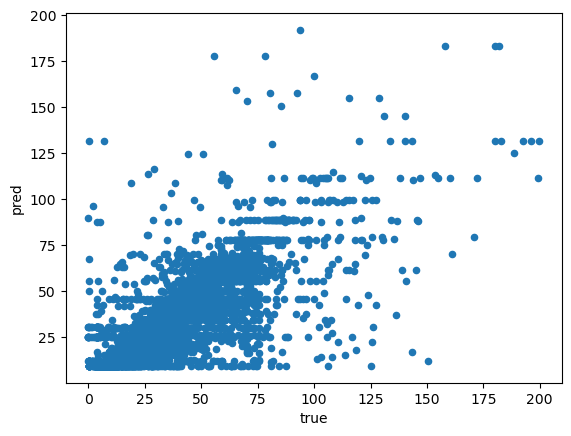

In [54]:
data = {'true':y_test_b , 'pred': y_pred_b}
results = pd.DataFrame(data)
results.plot(kind= 'scatter', x= 'true', y = 'pred')

In [55]:
categorical_feature_benchmark = ['PULocationID','transaction_month', 'transaction_day', 'transaction_hour']
input_feature_benchmark = categorical_feature_benchmark
target_feature_benchmark = 'total_amount'

from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_feature_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench,y_bench, test_size=0.25, random_state=42)

#fit the model
tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(x_train_b, y_train_b)

model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error ', mean_absolute_error(y_test_b,y_pred_b) )
print('mean_squared_error ', mean_squared_error(y_test_b,y_pred_b) )
print('root_mean_squared_error ', sqrt(mean_squared_error(y_test_b,y_pred_b)) )
print('r2 ', r2_score(y_test_b,y_pred_b) )


mean_absolute_error  10.694949043194192
mean_squared_error  241.10759347083697
root_mean_squared_error  15.52763966193307
r2  0.19089533528163072


<Axes: xlabel='true', ylabel='pred'>

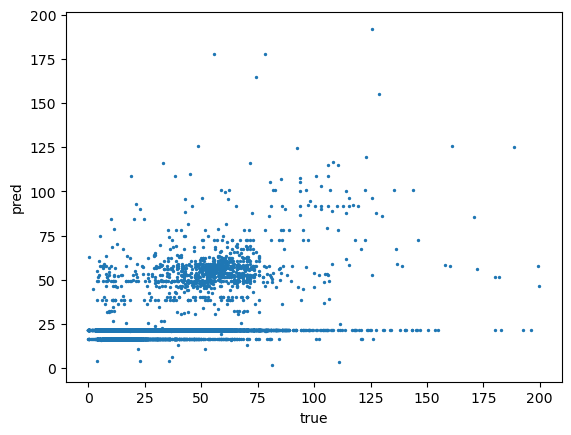

In [56]:
data = {'true':y_test_b , 'pred': y_pred_b}
results = pd.DataFrame(data)
results.plot(kind= 'scatter', x= 'true', y = 'pred', s=2)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [118]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [162]:
data_with_new_features = taxi_grouped_by_region.copy()

### Date related features

In [163]:
taxi_grouped_by_region.dtypes

PULocationID                     object
transaction_date         datetime64[ns]
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
dtype: object

In [164]:
data_with_new_features.loc[:,'transaction_date'] = pd.to_datetime(data_with_new_features.loc[:,'transaction_date'])

In [165]:
# data_with_new_features.loc[:,'transaction_date'] = pd.to_datetime(data_with_new_features.loc[:,'transaction_date'], format='%Y-%m-%d', errors='coerce')  

In [166]:
# data_with_new_features['transaction_date'].astype('datetime64[us]')
data_with_new_features['transaction_date'].dtype

dtype('<M8[ns]')

In [167]:
data_with_new_features['transaction_week_day'] = taxi_grouped_by_region['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x:True if x==5 or x==6 else False)

In [168]:
from pandas. tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [169]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


In [170]:
zone_lookup = pd.read_csv('Data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [171]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [172]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        45379
Brooklyn         23721
Queens           22004
Bronx             9649
Unknown            745
Staten Island      304
EWR                271
Name: count, dtype: int64

In [175]:
data_with_new_features.isna().sum()

PULocationID             0
transaction_date         0
transaction_month        0
transaction_day          0
transaction_hour         0
trip_distance            0
total_amount             0
count_of_transactions    0
transaction_week_day     0
weekend                  0
is_holiday               0
Borough                  0
dtype: int64

In [174]:
data_with_new_features = data_with_new_features.dropna(subset=['Borough'])

In [176]:
nyc_weather = pd.read_csv("Data/nyc_weather.csv")

In [177]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [178]:
nyc_weather.shape

(2936, 6)

In [179]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [180]:
nyc_weather['cloud cover'].value_counts()

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [181]:
nyc_weather['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0            

In [182]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [183]:
nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation']=nyc_weather['amount of precipitation'].astype(float)

# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True) # ff is forward fill , bf is backwardfill
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [184]:
nyc_weather['cloud cover'] =  nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] =  nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] =  nyc_weather['cloud cover'].replace('20–30%.', 0.2)
nyc_weather['cloud cover'] =  nyc_weather['cloud cover'].replace('50%.', 0.2)
nyc_weather['cloud cover'] =  nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] =  nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)

nyc_weather['cloud cover'] =  nyc_weather['cloud cover'].astype(float)

nyc_weather['cloud cover'].interpolate(inplace=True)

In [185]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [186]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])

nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

C:\Users\hdabe\AppData\Local\Temp\ipykernel_25368\3180068869.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nyc_weather['date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])


In [187]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.2,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [188]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [189]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on=['transaction_month','transaction_day','transaction_hour'], right_on=['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102073, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [190]:
nyc_taxi_with_weather=nyc_taxi_with_weather.drop(['date and time','hour','month','day'],axis=1)

In [191]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [192]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                65419
humidity                   65419
wind speed                 65419
cloud cover                65419
amount of precipitation    65419
dtype: int64

In [193]:
nyc_taxi_with_weather =nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [194]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method= 'bfill')
nyc_taxi_with_weather.isna().sum()

C:\Users\hdabe\AppData\Local\Temp\ipykernel_25368\2508825481.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
C:\Users\hdabe\AppData\Local\Temp\ipykernel_25368\2508825481.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method= 'bfill')


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [195]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [196]:
data_for_model = nyc_taxi_with_weather.copy()

In [197]:
categorical_features = ['PULocationID','transaction_month','transaction_day','transaction_hour','transaction_week_day','weekend','is_holiday','Borough']
input_features = categorical_features + ['temperature','humidity','wind speed','cloud cover','amount of precipitation']
target_feature = 'total_amount'

### Train-test split

In [198]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

#one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## 7.1. Decision tree <a id='decision_tree'></a>
[Back to top](#table_of_contents)

In [201]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [202]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error ', mean_absolute_error(y_test,y_pred) )
print('mean_squared_error ', mean_squared_error(y_test,y_pred) )
print('root_mean_squared_error ', sqrt(mean_squared_error(y_test,y_pred)) )
print('r2 ', r2_score(y_test,y_pred) )


mean_absolute_error  8.72960799913845
mean_squared_error  193.22354941302427
root_mean_squared_error  13.900487380413116
r2  0.3054975009963993


<Axes: xlabel='true', ylabel='pred'>

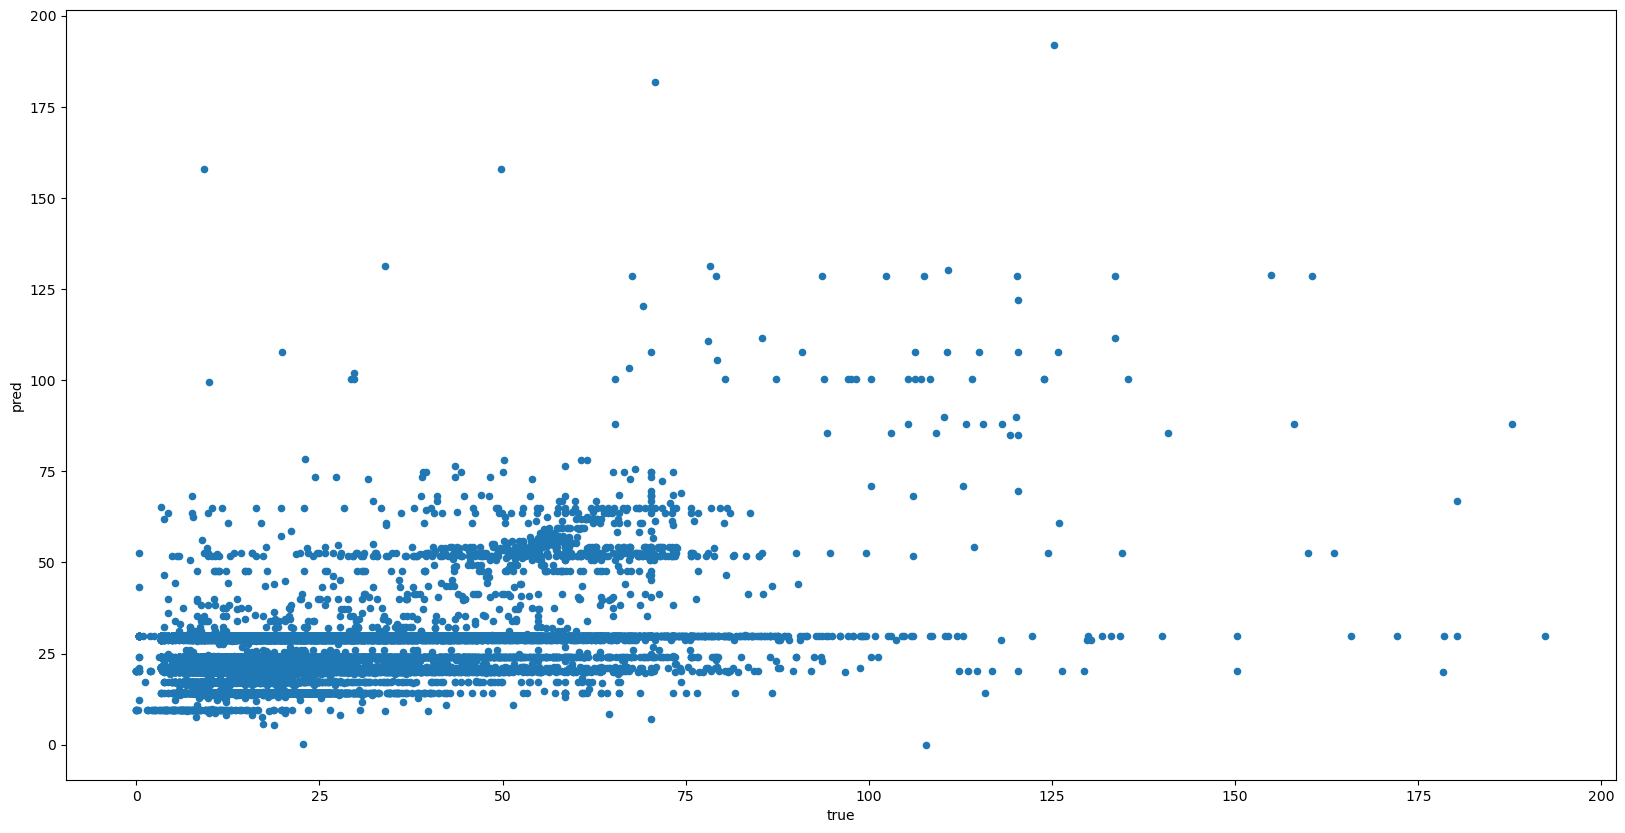

In [204]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)
results.plot(figsize=(20,10), kind= 'scatter', x='true', y = 'pred')

## 7.2. Random forest <a id='random_forest'></a>
[Back to top](#table_of_contents)

In [206]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor()
random_model.fit(X_train,y_train)

RandomForestRegressor()

In [207]:
model_at_hand = random_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error ', mean_absolute_error(y_test,y_pred) )
print('mean_squared_error ', mean_squared_error(y_test,y_pred) )
print('root_mean_squared_error ', sqrt(mean_squared_error(y_test,y_pred)) )
print('r2 ', r2_score(y_test,y_pred) )


mean_absolute_error  7.607194870577962
mean_squared_error  173.6844641992453
root_mean_squared_error  13.178940177390794
r2  0.37572674350041424


<Axes: xlabel='true', ylabel='pred'>

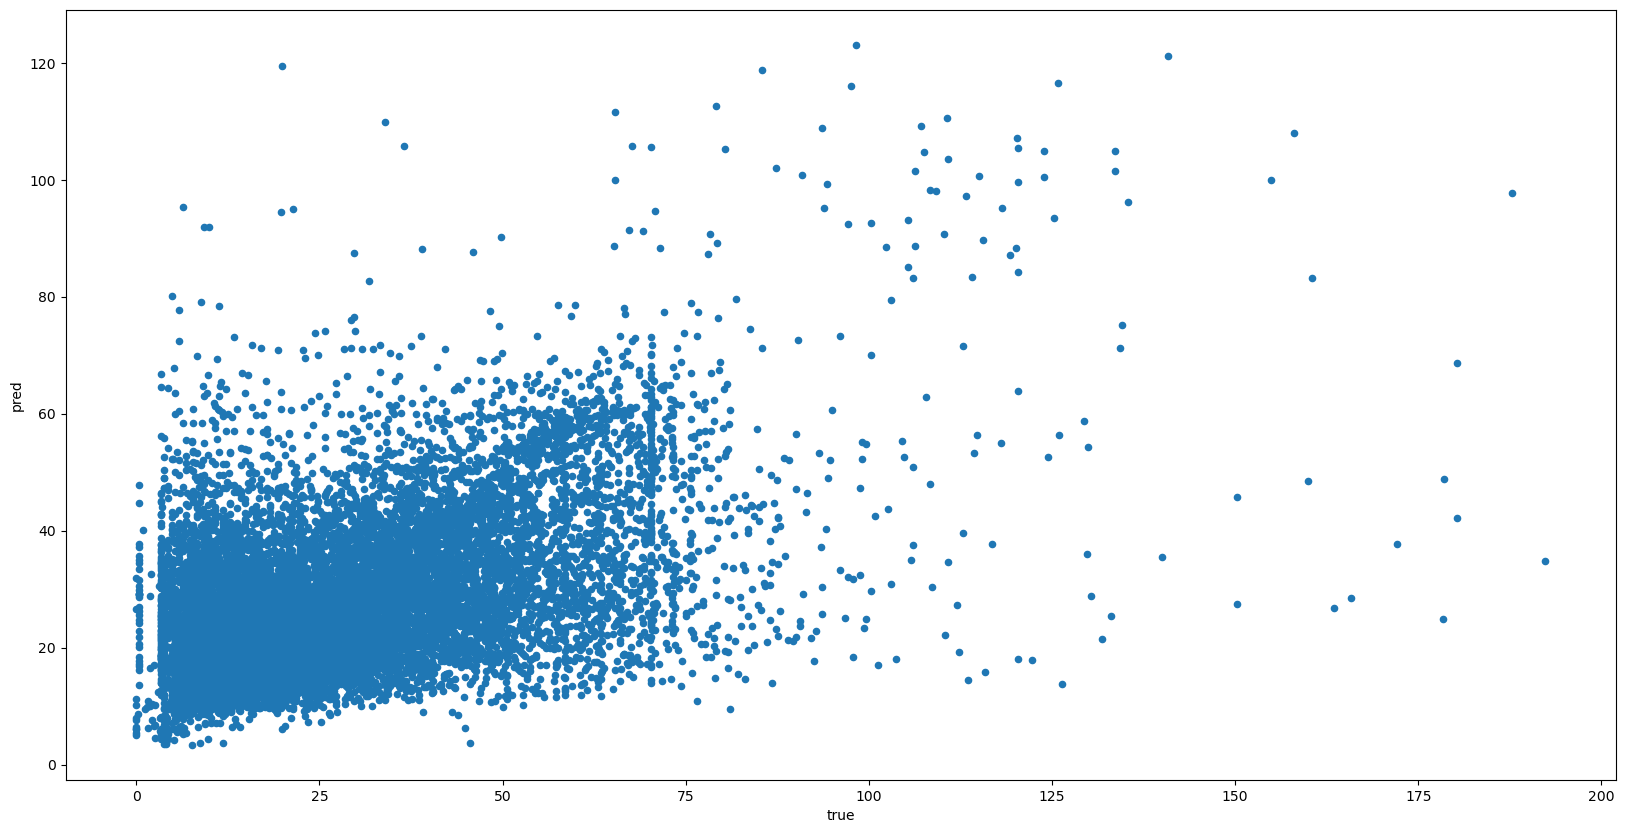

In [208]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)
results.plot(figsize=(20,10), kind= 'scatter', x='true', y = 'pred')

## 7.3. Gradient boosting <a id='gradient_boosting'></a>
[Back to top](#table_of_contents)

In [209]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [210]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error ', mean_absolute_error(y_test,y_pred) )
print('mean_squared_error ', mean_squared_error(y_test,y_pred) )
print('root_mean_squared_error ', sqrt(mean_squared_error(y_test,y_pred)) )
print('r2 ', r2_score(y_test,y_pred) )

mean_absolute_error  8.62417564071616
mean_squared_error  178.0460886047093
root_mean_squared_error  13.343391195820848
r2  0.3600497773205058


<Axes: xlabel='true', ylabel='pred'>

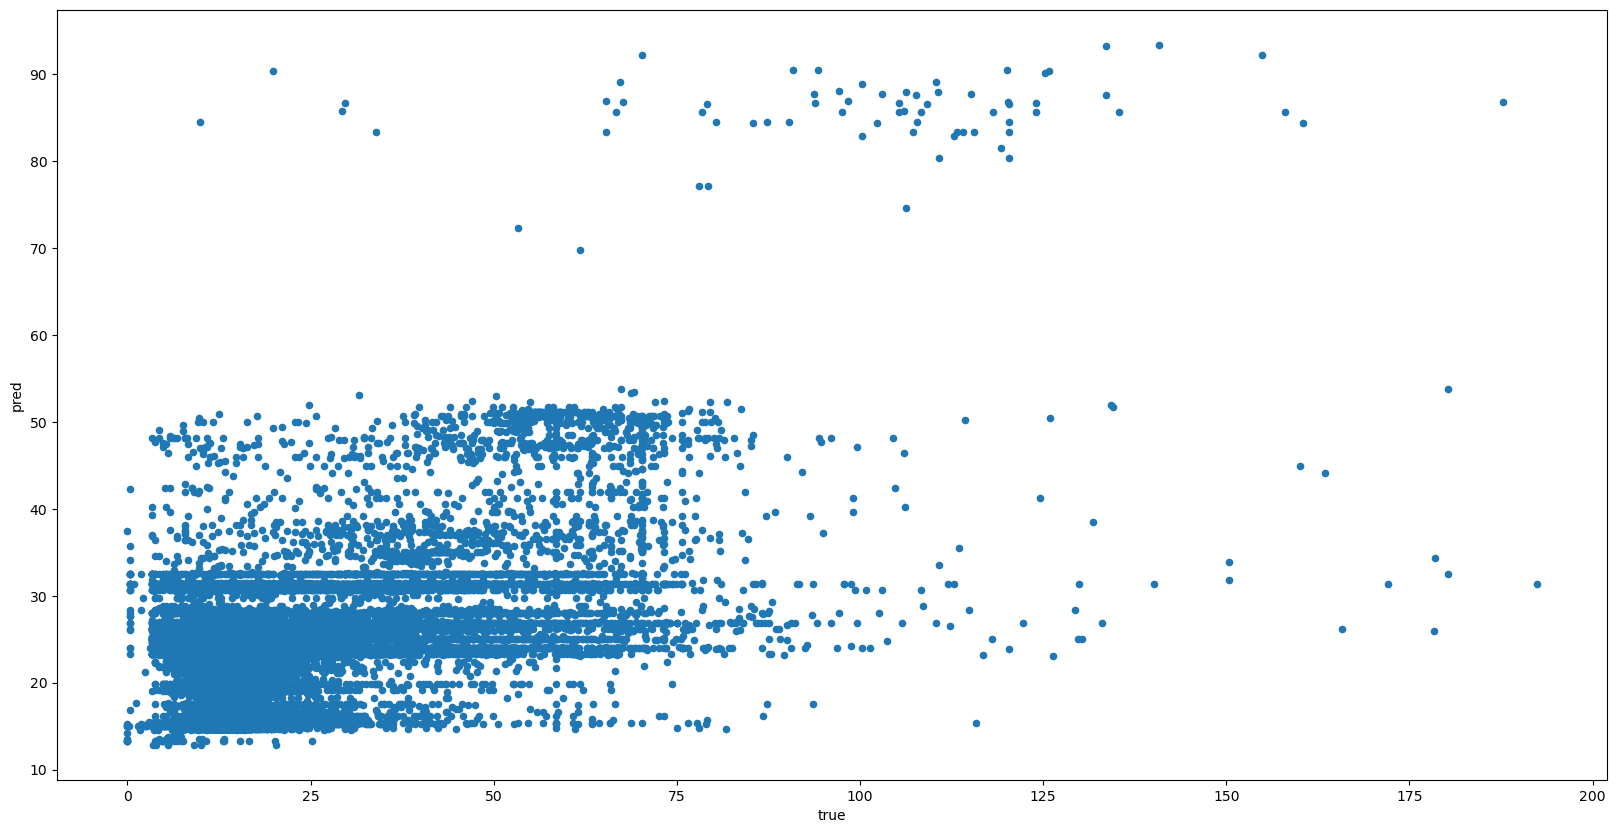

In [211]:
data = {'true':y_test, 'pred':y_pred}
results = pd.DataFrame(data)
results.plot(figsize=(20,10), kind= 'scatter', x='true', y = 'pred')